# Rerun notebook since database on disk was updataed with lat long coords from wildRtrax
### Develop a process to plot the locations of the olive sided flycatcher and other auido clips in a filtered dataset.
https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3


In [1]:
import sys
sys.path.append('../../src')

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import data.clean_csv
from utils import *

%conda install geopandas -y
import geopandas as gpd
# process the raw csv file (optional)
# clean_csv.process_raw_csv()

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
### Step 1: load the cleaned dataframe from file
data_path = Path('../../data/')
df = pd.read_pickle(data_path / 'interim' / 'processed_metadata.pkl')
df.head()
keep_cols = ['organization', 'project', 'project_id', 'location', 'location_id',
       'recording_date_time', 'recording_id', 'task_method', 'task_id',
       'aru_task_status', 'species_code', 'species_common_name',
       'species_scientific_name', 'species_class', 'detection_time',
       'task_duration', 'tag_duration', 'min_tag_freq', 'max_tag_freq',
       'tag_id', 'individual_order', 'vocalization', 'abundance', 'tag_rating',
       'tag_is_verified', 
       'verifier_id','media_url', 'clip_url', 'sensorId', 'tasks',
       'status', 'recording_url', 'file_type', 'longitude', 'latitude']
df = df[keep_cols]
df.tail()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,verifier_id,media_url,clip_url,sensorId,tasks,status,recording_url,file_type,longitude,latitude
2365404,BU,Zeller Woodpeckers- Time of Day,1241,Y-31-333-NE,43788,2017-05-03 05:36:00,480313,nan,442071,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-110.557684,55.903330
2365409,BU,Zeller Woodpeckers- Time of Day,1241,Y-39-414-B2,43941,2016-05-15 05:51:00,480560,nan,442318,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-111.829752,54.983633
2365410,BU,Zeller Woodpeckers- Time of Day,1241,Y-39-414-B2,43941,2016-05-15 05:51:00,480560,nan,442318,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-111.829752,54.983633
2365426,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303,2018-06-17 06:05:00,480596,nan,442354,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-111.216114,57.471476
2365427,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303,2018-06-17 06:05:00,480596,nan,442354,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-111.216114,57.471476


In [3]:
df.project_id.value_counts()[:10].sum()/df.project_id.value_counts().sum()

0.5137362311839473

In [4]:
df.project_id.unique().shape

(114,)

Out of 117 projects, the top 10 account for 55% of the clips in the database. 

<Axes: title={'center': 'Top 10 Projects whole database'}, xlabel='Project ID', ylabel='Number of clips'>

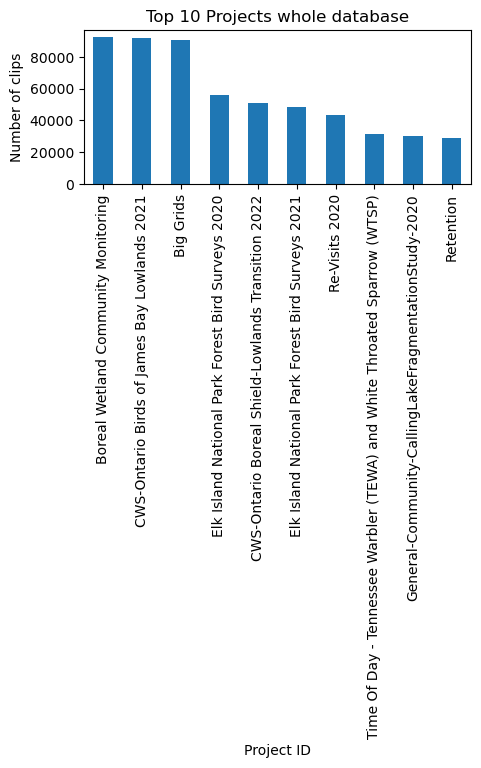

In [5]:
# plot the value counts of the top 10 projects.
# rotate the x ticks to be vertical
df.project.value_counts()[:10].plot(kind='bar', figsize=(5,2), rot=90, title='Top 10 Projects whole database', ylabel='Number of clips', xlabel='Project ID')

In [6]:
df.project_id.value_counts()

project_id
41      92291
885     91628
31      90345
662     56098
1310    50790
        ...  
681        39
779        33
815         7
1501        3
105         2
Name: count, Length: 114, dtype: int64

The 

<Axes: xlabel='longitude', ylabel='latitude'>

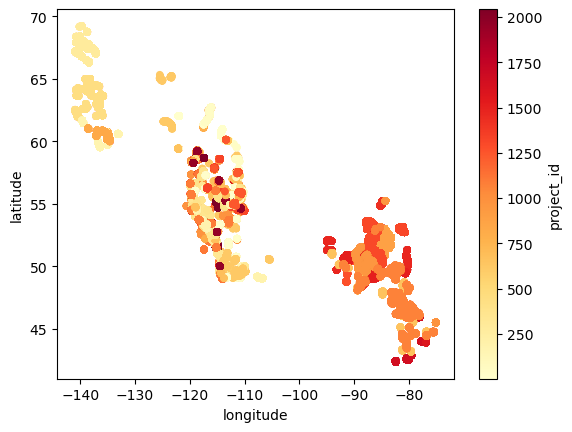

In [7]:
df.plot(x='longitude', y='latitude', kind='scatter', c='project_id', colormap='YlOrRd')

The longitude values at 113.4937 from the raw data were successfully dropped in the process_csv() funciton. 

In [8]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_40774/1771207407.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

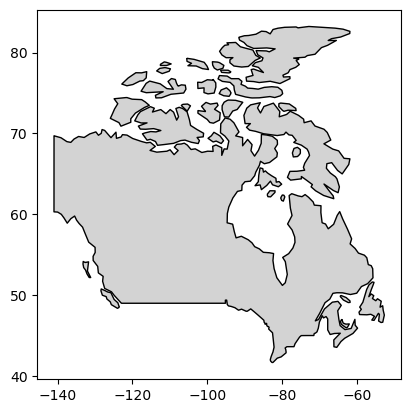

In [9]:
countries[countries.name=='Canada'].plot(color='lightgrey', edgecolor='black')

In [10]:
def plot_locations(df, title = 'clip_locations'):
        # initialize an axis
        fig, ax = plt.subplots(figsize=(5,5))
        # plot map on axis
        countries = gpd.read_file(  
        gpd.datasets.get_path("naturalearth_lowres"))
        countries[countries["name"] == "Canada"].plot(color="lightgrey",ax=ax)
        # plot points
        df.plot(x="longitude", y="latitude", kind="scatter", 
         s=4, alpha=0.01, c="red",
                title=title, 
                ax=ax)
        # add grid
        ax.grid(alpha=0.5)
        plt.show()

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_40774/3259317698.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


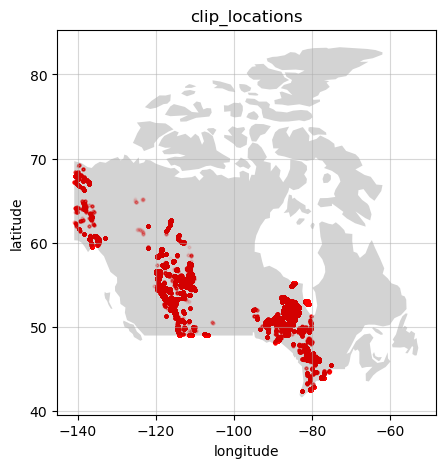

In [11]:
plot_locations(df)

/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_40774/3259317698.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


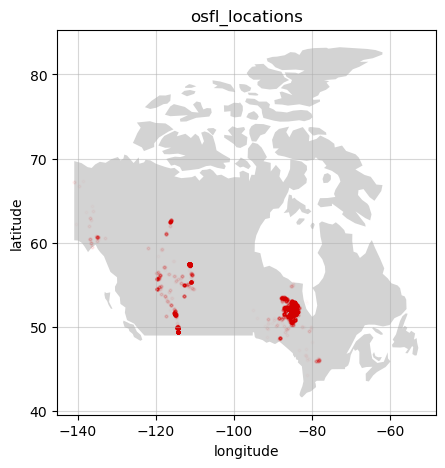

In [12]:
osfls  = df.loc[df.species_code == 'OSFL']
plot_locations(osfls, title='osfl_locations')

### Build a function to merge a dataframe and a locations.csv

# Todo: 
- build a better colour map for the legend. One with a different colour per sensible division of data, rather than sliding scale for project ID
- group the dataset by recording instead of clip. 
- load the cooridnate locations for the data from R instead of trying to download from the wildtrax website



In [13]:
df.head()

,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,...,verifier_id,media_url,clip_url,sensorId,tasks,status,recording_url,file_type,longitude,latitude
1623,BU,Alberta Archetypes,1501,P-E0-1-10,308678,2022-06-05 06:51:00,416962,nan,596169,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-115.140510,52.644040
1624,BU,Alberta Archetypes,1501,P-E0-1-10,308678,2022-06-05 06:51:00,416962,nan,596169,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-115.140510,52.644040
1625,BU,Alberta Archetypes,1501,P-E0-1-10,308678,2022-06-05 06:51:00,416962,nan,596169,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,357,Active,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-115.140510,52.644040
1752,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,nan,87956,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,174,Published - Private,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-110.681271,54.607774
1753,BU,Amplitude Quality Testing 2020,293,AM-403-SE2,36043,2017-06-15 04:46:00,92051,nan,87956,Transcribed,...,-1,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,174,Published - Private,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,flac,-110.681271,54.607774


In [14]:
df.groupby('recording_id')

<Axes: title={'center': 'total clips per recording'}, xlabel='Recording ID', ylabel='Number of clips'>

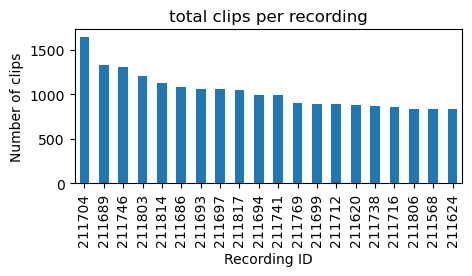

In [19]:
df.recording_id.value_counts()[:20].plot(kind='bar', figsize=(5,2), rot=90, title='total clips per recording', ylabel='Number of clips', xlabel='Recording ID')


<Axes: title={'center': 'osfl clips per recording'}, xlabel='Recording ID', ylabel='Number of clips'>

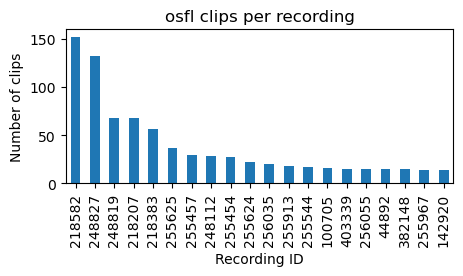

In [20]:

osfls.recording_id.value_counts()[:20].plot(kind='bar', figsize=(5,2), rot=90, title='osfl clips per recording', ylabel='Number of clips', xlabel='Recording ID')